In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os.path as osp
from src.dataset.dataset_processing import CFD_dataset
from src.models.models import GCN
import torch

In [4]:
a = np.load('losses.npy.npz')

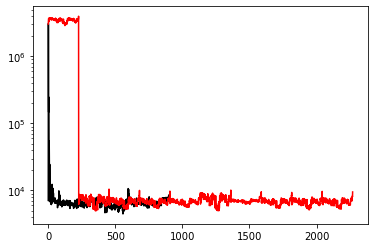

In [10]:
plt.semilogy(a['train'],'k')
plt.semilogy(a['val'],'r')

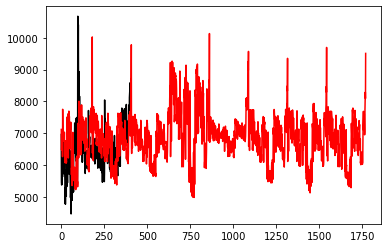

In [11]:
plt.plot(a['train'][500:],'k')
plt.plot(a['val'][500:],'r')

In [20]:
dataset = CFD_dataset('./data/')
data = dataset[0]
model = GCN(256, 4)
model.load_state_dict(torch.load('model.pt',map_location=torch.device('cpu')))
T_out = model(data)

Processing...
Done!


(array([33539., 11228.,  4346.,  2940.,  2161.,  2211.,  2909.,  9869.,
        17592.,  8523.]),
 array([297.858 , 298.2891, 298.7202, 299.1513, 299.5824, 300.0135,
        300.4446, 300.8757, 301.3068, 301.7379, 302.169 ]),
 <BarContainer object of 10 artists>)

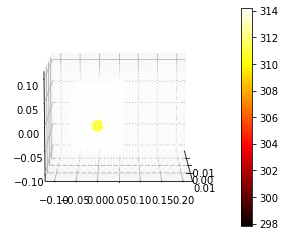

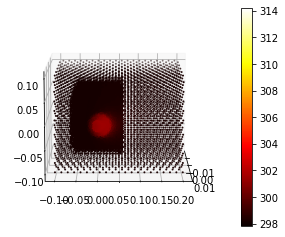

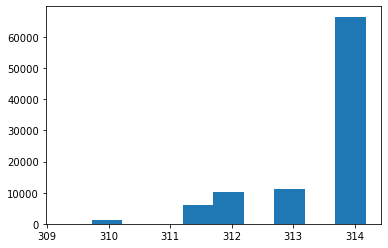

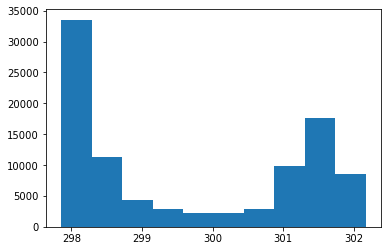

In [79]:
df_all = pd.read_csv('./data/raw/data_air.csv')  
df_air = df_all[df_all['Block Name']=='internalMesh'].iloc[::2]
df_air.head()

pos_air = data.pos[1:len(df_air)].detach().numpy()
T_out_air = T_out[1:len(df_air)].detach().numpy()
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.view_init(elev=10., azim=0)
cmhot = plt.cm.get_cmap("hot")
p = ax.scatter3D(pos_air[:,0], pos_air[:,1],pos_air[:,2],c=T_out_air, s = 1,cmap=cmhot,vmin = np.min([df_air['T'].min(),np.min(T_out_air)]),vmax=np.max([df_air['T'].max(),np.max(T_out_air)]));
fig.colorbar(p)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.view_init(elev=10., azim=0)
cmhot = plt.cm.get_cmap("hot")
p = ax.scatter3D(df_air['Points_0'], df_air['Points_1'],df_air['Points_2'],c=df_air['T'], s = 1,cmap=cmhot,vmin = np.min([df_air['T'].min(),np.min(T_out_air)]),vmax=np.max([df_air['T'].max(),np.max(T_out_air)]));
fig.colorbar(p)

fig = plt.figure()
plt.hist(T_out_air)

fig = plt.figure()
plt.hist(df_air['T'])

/tmp/ipykernel_1876388/1090623248.py:21: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  p = fig.colorbar(p)


(array([1421., 2999., 4255., 5246., 8245., 5939., 4846., 3601., 3143.,
        1144.]),
 array([300.783 , 300.9255, 301.068 , 301.2105, 301.353 , 301.4955,
        301.638 , 301.7805, 301.923 , 302.0655, 302.208 ]),
 <BarContainer object of 10 artists>)

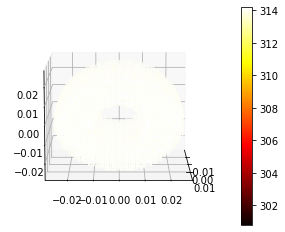

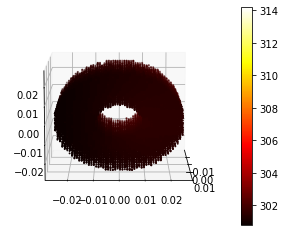

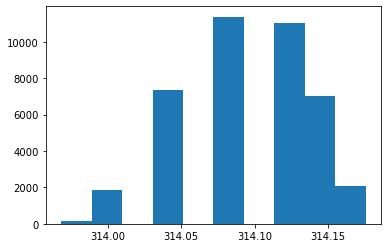

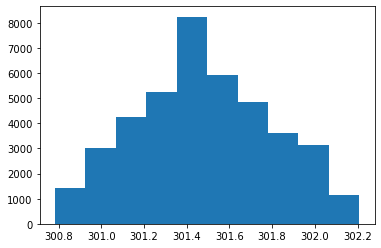

In [78]:
## tube 
df_tube_all = pd.read_csv('./data/raw/data_tube.csv')  
df_tube = df_tube_all[df_tube_all['Block Name']=='internalMesh'].iloc[::2]
df_tube.head()
len(df_tube)

pos_tube = data.pos[len(df_air): len(df_air)+len(df_tube)].detach().numpy()
T_out_tube = T_out[len(df_air): len(df_air)+len(df_tube)].detach().numpy()
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.view_init(elev=10., azim=0)
cmhot = plt.cm.get_cmap("hot")
p = ax.scatter3D(pos_tube[:,0], pos_tube[:,1],pos_tube[:,2],c=T_out_tube, s = 1,cmap=cmhot,vmin = np.min([df_tube['T'].min(),np.min(T_out_tube)]),vmax=np.max([df_tube['T'].max(),np.max(T_out_tube)]));
fig.colorbar(p)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.view_init(elev=10., azim=0)
cmhot = plt.cm.get_cmap("hot")
ax.scatter3D(df_tube['Points_0'], df_tube['Points_1'],df_tube['Points_2'],c=df_tube['T'], s = 1,cmap=cmhot,vmin = np.min([df_tube['T'].min(),np.min(T_out_tube)]),vmax=np.max([df_tube['T'].max(),np.max(T_out_tube)]));
p = fig.colorbar(p)

fig = plt.figure()
plt.hist(T_out_tube)

fig = plt.figure()
plt.hist(df_tube['T'])

(array([5920.,  502., 1169., 1836., 2030., 1425., 1147.,  976.,  881.,
        1750.]),
 array([301.027 , 305.4243, 309.8216, 314.2189, 318.6162, 323.0135,
        327.4108, 331.8081, 336.2054, 340.6027, 345.    ]),
 <BarContainer object of 10 artists>)

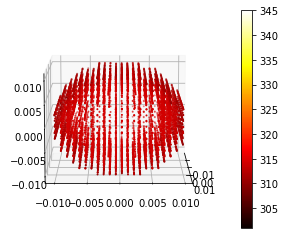

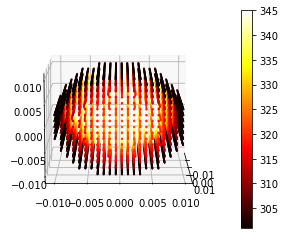

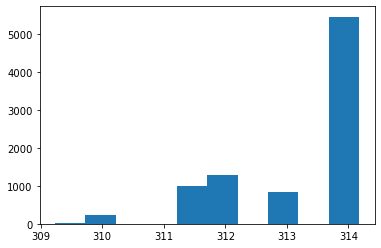

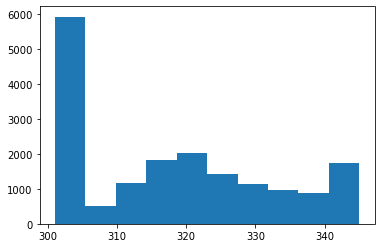

In [77]:
## tube 
df_all_co2 = pd.read_csv('./data/raw/data_co2.csv')  
df_co2 = df_all_co2[df_all_co2['Block Name']=='internalMesh']
df_co2.head()

pos_co2 = data.pos[len(df_air)+len(df_tube):].detach().numpy()
T_out_co2 = T_out[len(df_air)+len(df_tube):].detach().numpy()
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.view_init(elev=10., azim=0)
cmhot = plt.cm.get_cmap("hot")
p = ax.scatter3D(pos_co2[:,0], pos_co2[:,1],pos_co2[:,2],c=T_out_co2, s = 1,cmap=cmhot,vmin = np.min([df_co2['T'].min(),np.min(T_out_co2)]),vmax=np.max([df_co2['T'].max(),np.max(T_out_co2)]));
fig.colorbar(p)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.view_init(elev=10., azim=0)
cmhot = plt.cm.get_cmap("hot")
p = ax.scatter3D(df_co2['Points_0'], df_co2['Points_1'],df_co2['Points_2'],c=df_co2['T'], s = 1,cmap=cmhot,vmin = np.min([df_co2['T'].min(),np.min(T_out_co2)]),vmax=np.max([df_co2['T'].max(),np.max(T_out_co2)]));
fig.colorbar(p)

fig = plt.figure()
plt.hist(T_out_co2)

fig = plt.figure()
plt.hist(df_co2['T'])

In [65]:
len(T_out)-len(df_air)-len(df_tube)

-127339